In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("AcademicPerformance.csv")

In [17]:
print(df)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  Year_Birth  math score  reading score  \
0                      none        1970        72.0           72.

In [4]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Year_Birth,math score,reading score,writing score,Dt_Admission,College_Fees
0,female,group B,bachelor's degree,standard,none,1970,72.0,72,74,6/16/14,"$84,835.00"
1,female,group C,some college,standard,completed,1961,NaN,na,A,6/15/14,"$57,091.00"
2,female,group B,master's degree,standard,none,1958,90.0,95,93,5/13/14,"$67,267.00"
3,male,group A,associate's degree,free/reduced,none,1967,NaN,NaN,44,05-11-2014,"$32,474.00"
4,male,group C,some college,standard,none,1989,76.0,78,75,04-08-2014,"$21,474.00"
5,female,group B,associate's degree,standard,none,1958,71.0,83,78,3/17/14,"$71,691.00"
6,female,group B,some college,standard,completed,1954,88.0,95,92,1/29/14,"$63,564.00"
7,male,group B,some college,free/reduced,none,1967,40.0,43,39,1/18/14,"$44,931.00"
8,male,group D,high school,free/reduced,completed,1954,64.0,64,67,01-11-2014,"$65,324.00"
9,female,group B,high school,free/reduced,none,1954,38.0,60,50,01-11-2014,"$65,324.00"


In [5]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
Year_Birth,0
math score,2
reading score,1
writing score,0
Dt_Admission,0


In [9]:
print(df["reading score"])

0       72
1       na
2       95
3      NaN
4       78
      ... 
995     99
996     55
997     71
998     78
999     86
Name: reading score, Length: 1000, dtype: object


In [10]:
print(df["math score"])

0      72.0
1       NaN
2      90.0
3       NaN
4      76.0
       ... 
995    88.0
996    62.0
997    59.0
998    68.0
999    77.0
Name: math score, Length: 1000, dtype: float64


In [11]:
missing_values=['n/a','na','--']
df=pd.read_csv("AcademicPerformance.csv",na_values=missing_values)

In [14]:
print(df["reading score"])

0      72.0
1       NaN
2      95.0
3       NaN
4      78.0
       ... 
995    99.0
996    55.0
997    71.0
998    78.0
999    86.0
Name: reading score, Length: 1000, dtype: float64


In [16]:
print(df['math score'])

0      72.0
1       NaN
2      90.0
3       NaN
4      76.0
       ... 
995    88.0
996    62.0
997    59.0
998    68.0
999    77.0
Name: math score, Length: 1000, dtype: float64


In [19]:
dataset = [11,41,20,3,101,55,68,97,99,6]
sorted(dataset)

[3, 6, 11, 20, 41, 55, 68, 97, 99, 101]

In [20]:
import numpy as np
quantile1,quantile3=np.percentile(dataset, [25,75])

In [21]:
print(quantile1,quantile3)

13.25 89.75


In [26]:
iqr_value=(quantile3-quantile1)
print(iqr_value)

76.5


In [29]:
lower_bound=quantile1-(1.5*iqr_value)
upper_bound=quantile3+(1.5*iqr_value)
print(lower_bound, upper_bound)

-101.5 204.5


In [32]:
from datetime import date
df['age']=date.today().year-df['Year_Birth']
df['Year']=pd.DatetimeIndex(df['Dt_Admission']).year
df['E_L']=date.today().year-df['Year']

In [33]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Year_Birth,math score,reading score,writing score,Dt_Admission,College_Fees,age,Year,E_L
0,female,group B,bachelor's degree,standard,none,1970,72.0,72.0,74,6/16/14,"$84,835.00",55,2014,11
1,female,group C,some college,standard,completed,1961,NaN,NaN,A,6/15/14,"$57,091.00",64,2014,11
2,female,group B,master's degree,standard,none,1958,90.0,95.0,93,5/13/14,"$67,267.00",67,2014,11
3,male,group A,associate's degree,free/reduced,none,1967,NaN,NaN,44,05-11-2014,"$32,474.00",58,2014,11
4,male,group C,some college,standard,none,1989,76.0,78.0,75,04-08-2014,"$21,474.00",36,2014,11


In [34]:
df['Fees$'] = df['College_Fees'].str.replace(',', '').str.replace('$', '').str.replace('.', '').fillna(0).astype(int)
df['Fees_M$'] = df['Fees$'].apply(lambda X:round(X/1000000))

In [35]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Year_Birth,math score,reading score,writing score,Dt_Admission,College_Fees,age,Year,E_L,Fees$,Fees_M$
0,female,group B,bachelor's degree,standard,none,1970,72.0,72.0,74,6/16/14,"$84,835.00",55,2014,11,8483500,8
1,female,group C,some college,standard,completed,1961,NaN,NaN,A,6/15/14,"$57,091.00",64,2014,11,5709100,6
2,female,group B,master's degree,standard,none,1958,90.0,95.0,93,5/13/14,"$67,267.00",67,2014,11,6726700,7
3,male,group A,associate's degree,free/reduced,none,1967,NaN,NaN,44,05-11-2014,"$32,474.00",58,2014,11,3247400,3
4,male,group C,some college,standard,none,1989,76.0,78.0,75,04-08-2014,"$21,474.00",36,2014,11,2147400,2


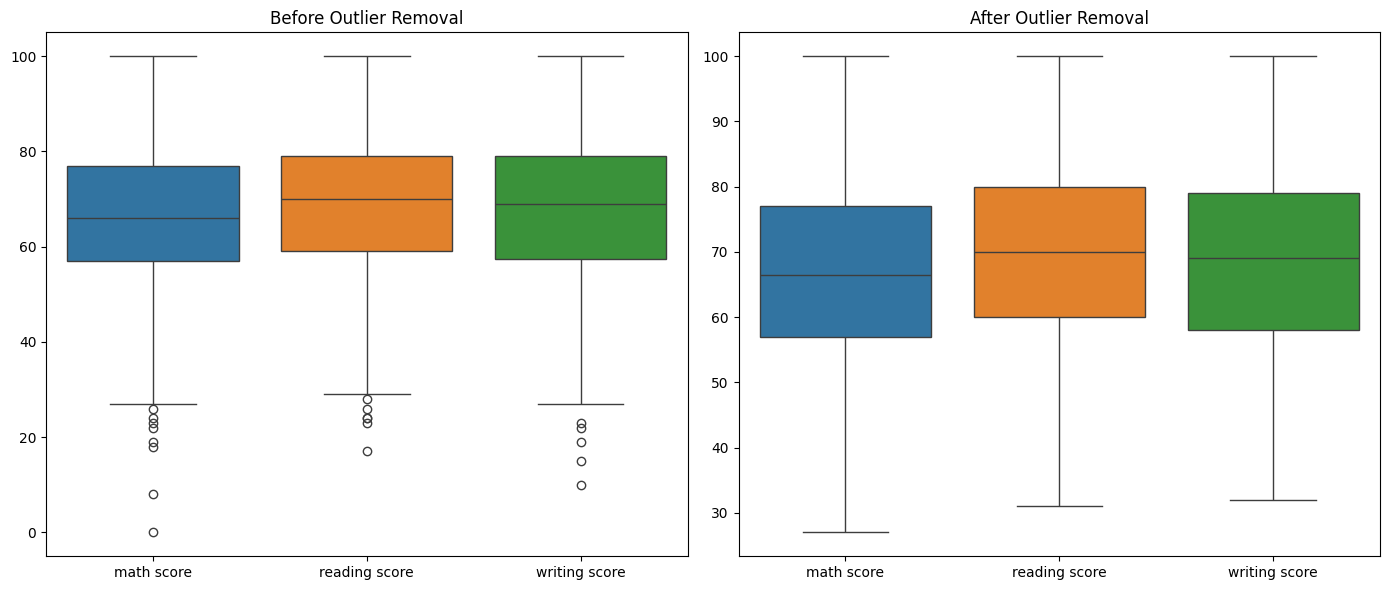

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset and handle common missing values
#missing_values = ["n/a", "na", "--", "A"]
#df = pd.read_csv("AcademicPerformance.csv", na_values=missing_values)

# Convert score columns to numeric
df['math score'] = pd.to_numeric(df['math score'], errors='coerce')
df['reading score'] = pd.to_numeric(df['reading score'], errors='coerce')
df['writing score'] = pd.to_numeric(df['writing score'], errors='coerce')

# Function to remove outliers using IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Create a copy of the original DataFrame
df_cleaned = df.copy()
for col in ['math score', 'reading score', 'writing score']:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)

# Plotting before and after outlier removal
plt.figure(figsize=(14, 6))

# Before removal
plt.subplot(1, 2, 1)
sns.boxplot(data=df[['math score', 'reading score', 'writing score']])
plt.title("Before Outlier Removal")

# After removal
plt.subplot(1, 2, 2)
sns.boxplot(data=df_cleaned[['math score', 'reading score', 'writing score']])
plt.title("After Outlier Removal")

plt.tight_layout()
plt.show()
